# Make subsets from the virosphere-fold-v1_fulldata.csv

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from Bio.Seq import Seq
from Bio import SeqIO
from Bio import Entrez

In [4]:
dataset_file = "../dataset_preparation/virosphere-fold-v1_fulldata.csv"
virosphere = pd.read_csv(dataset_file, index_col=0)
virosphere.index.name = None

In [5]:
virosphere

,translation,gene,product,protein_id,mat_pept_id,reg_id,uniq_id,pept_cat,note,nt_acc,...,Exemplar or additional isolate,Virus name(s),Virus name abbreviation(s),Virus isolate designation,Virus REFSEQ accession,Genome coverage,Genome composition,Host source,host,coordinates
CAA52564.1_4563,M,E2,early protein,CAA52564.1,NaN,NaN,CAA52564.1,protein,NaN,X74477.1,...,A,human papillomavirus 35,HPV35,NaN,NaN,Complete genome,dsDNA,vertebrates,NaN,[2713:>2717](+)
CAA27332.1.11_7160,G,NaN,polyprotein precursor,CAA27332.1,CAA27332.1.11,NaN,CAA27332.1.11,mat_pept,putative replicase component NS5,X03700.1,...,E,yellow fever virus,YFV,17D,NC_002031,Complete genome,ssRNA(+),"invertebrates, vertebrates",NaN,[2506:>2507]
AAA47931.1.5_10363,NPAA,NaN,polyprotein,AAA47931.1,AAA47931.1.5,NaN,AAA47931.1.5,mat_pept,unnamed,M94868.1,...,A,cardiovirus B2; Vilyuisk human encephalomyelit...,CaV-B2; VHEV,V1 (human/Russia-Siberia/1955),NaN,Partial genome,ssRNA(+),vertebrates,NaN,[926:930]
CAA27339.1.3_11752,TNRLTH,NaN,NaN,CAA27339.1,CAA27339.1.3,NaN,CAA27339.1.3,mat_pept,pol protein (6 aa),X03711.1,...,E,Hardy-Zuckerman feline sarcoma virus,HZFeSV,NaN,NC_038923,Partial genome,ssRNA-RT,vertebrates,NaN,[784:790]
CAI74981.1.3_11505,ASGRALA,NaN,polyprotein precursor,CAI74981.1,CAI74981.1.3,NaN,CAI74981.1.3,mat_pept,pep7 protein,AJ920335.1,...,E,Tellina virus 1,TV1,NaN,SegA: NC_038869; SegB: NC_038870,Complete genome,dsRNA,invertebrates,Tellina tenuis,[492:499]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ASO76148.1_10247,MVLIVPLSRTNRPPITKPRHFHALPNYYTKYGSDIIKRNIYYNSVD...,ORF1ab,ORF1ab,ASO76148.1,NaN,NaN,ASO76148.1,protein,pp1ab replicase polyprotein,MF351889.1,...,E,Morelia viridis nidovirus,MVNV,NaN,NC_035465,Complete genome,ssRNA(+),vertebrates,Morelia viridis,"join{[855:17505](+), [17504:24440](+)}"
QRC47047.1_10244,MVFIHPNFVYLSKGLGKPRCTASTIVQREYQYQYISYPHKTVGSIF...,ORF1AB,ORF1AB,QRC47047.1,NaN,NaN,QRC47047.1,protein,ribosomal slippery sequence AAAAAAC at 17563.....,MT997160.1,...,E,Veiled chameleon serpentovirus A,VCSTV-A,A,NaN,Complete genome,ssRNA(+),vertebrates,Chamaeleo calyptratus,"join{[409:17569](+), [17568:24540](+)}"
AIJ50565.1_10246,MVLIVPLAYTNRPPICKPRRYSVLPSYHHKYGSDMIKRNIYYRGTD...,ORF1AB,pp1ab,AIJ50565.1,NaN,NaN,AIJ50565.1,protein,pp1ab replicase polyprotein,KJ541759.1,...,E,ball python nidovirus,BPNV,19541,NC_024709,Complete genome,ssRNA(+),vertebrates,Python regius,"join{[1017:18411](+), [18410:25343](+)}"
QRC47039.1_10254,MVVLQVVAQNATKSGETPGWRLPLKSLEKGKAIARKSMGSSLTLTQ...,ORF1AB,ORF1AB,QRC47039.1,NaN,NaN,QRC47039.1,protein,ribosomal slippery sequence AAAAAAC at 20100.....,MT997159.1,...,E,Veiled chameleon serpentovirus B,VCSTV-B,B,NaN,Complete genome,ssRNA(+),vertebrates,Chamaeleo calyptratus,"join{[399:20106](+), [20105:27182](+)}"


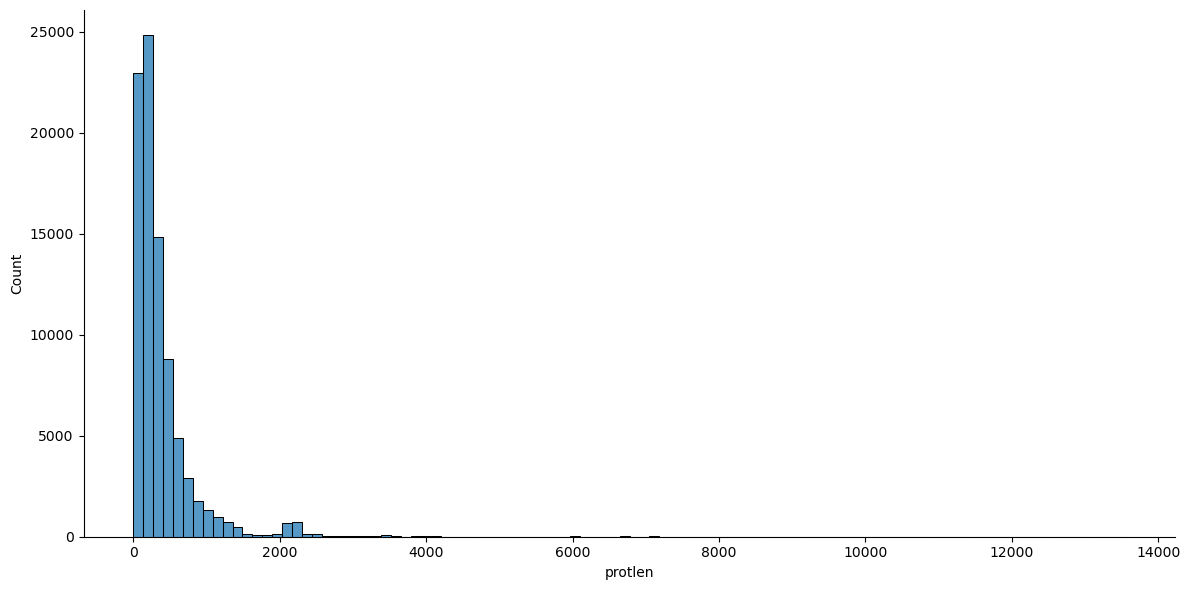

In [6]:
sns.displot(virosphere['protlen'], kde=False, bins=100, height=6, aspect=2)

## split all sequences longer than 10aa between 9 FASTA files

In [11]:
virosphere_subset = virosphere[virosphere['protlen'] > 10]

In [12]:
virosphere_subset

,header,translation,gene,product,protein_id,mat_pept_id,reg_id,uniq_id,pept_cat,note,...,Exemplar or additional isolate,Virus name(s),Virus name abbreviation(s),Virus isolate designation,Virus REFSEQ accession,Genome coverage,Genome composition,Host source,host,coordinates
15,CAX33877.1.4_11504,ASGTPITRASA,NaN,polyprotein,CAX33877.1,CAX33877.1.4,NaN,CAX33877.1.4,mat_pept,pep11 peptide,...,E,rotifer birnavirus,RBV,Palavas,NaN,Complete genome,dsRNA,invertebrates,Brachionus plicatilis,[518:529]
16,AAT67220.1.6_10459,VFAHKQGPVTFQ,NaN,polyprotein,AAT67220.1,AAT67220.1.6,NaN,AAT67220.1.6,mat_pept,2A,...,E,anativirus A1; duck picornavirus,AnaV-A1,TW90A,NC_006553,Complete genome,ssRNA(+),vertebrates,NaN,[1295:1307]
17,AAA73159.1_10363,MACKHGYPDVCP,NaN,hypothetical protein,AAA73159.1,NaN,NaN,AAA73159.1,protein,NaN,...,A,cardiovirus B2; Vilyuisk human encephalomyelit...,CaV-B2; VHEV,V1 (human/Russia-Siberia/1955),NaN,Partial genome,ssRNA(+),vertebrates,NaN,[930:>966](+)
18,CAD30689.1.5_11499,ASGTFSKRIPLA,NaN,polyprotein,CAD30689.1,CAD30689.1.5,NaN,CAD30689.1.5,mat_pept,VP2d protein,...,E,blotched snakehead virus,BSNV,NaN,SegA: NC_005982; SegB: NC_005983,Complete genome,dsRNA,vertebrates,Blotched Snakehead fish,[474:486]
19,AGZ63355.1.1.1_10906,PFSFSTPSPFPP,NaN,polyprotein,AGZ63355.1,NaN,AGZ63355.1.1.1,AGZ63355.1.1.1,region,polypyrimidine tracts,...,E,sakobuvirus A; feline sakobuvirus,SakV-A,FFUP1/Portugal/2012,NC_022802,Complete genome,ssRNA(+),vertebrates,Felis catus,[1:13]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87135,ASO76148.1_10247,MVLIVPLSRTNRPPITKPRHFHALPNYYTKYGSDIIKRNIYYNSVD...,ORF1ab,ORF1ab,ASO76148.1,NaN,NaN,ASO76148.1,protein,pp1ab replicase polyprotein,...,E,Morelia viridis nidovirus,MVNV,NaN,NC_035465,Complete genome,ssRNA(+),vertebrates,Morelia viridis,"join{[855:17505](+), [17504:24440](+)}"
87136,QRC47047.1_10244,MVFIHPNFVYLSKGLGKPRCTASTIVQREYQYQYISYPHKTVGSIF...,ORF1AB,ORF1AB,QRC47047.1,NaN,NaN,QRC47047.1,protein,ribosomal slippery sequence AAAAAAC at 17563.....,...,E,Veiled chameleon serpentovirus A,VCSTV-A,A,NaN,Complete genome,ssRNA(+),vertebrates,Chamaeleo calyptratus,"join{[409:17569](+), [17568:24540](+)}"
87137,AIJ50565.1_10246,MVLIVPLAYTNRPPICKPRRYSVLPSYHHKYGSDMIKRNIYYRGTD...,ORF1AB,pp1ab,AIJ50565.1,NaN,NaN,AIJ50565.1,protein,pp1ab replicase polyprotein,...,E,ball python nidovirus,BPNV,19541,NC_024709,Complete genome,ssRNA(+),vertebrates,Python regius,"join{[1017:18411](+), [18410:25343](+)}"
87138,QRC47039.1_10254,MVVLQVVAQNATKSGETPGWRLPLKSLEKGKAIARKSMGSSLTLTQ...,ORF1AB,ORF1AB,QRC47039.1,NaN,NaN,QRC47039.1,protein,ribosomal slippery sequence AAAAAAC at 20100.....,...,E,Veiled chameleon serpentovirus B,VCSTV-B,B,NaN,Complete genome,ssRNA(+),vertebrates,Chamaeleo calyptratus,"join{[399:20106](+), [20105:27182](+)}"


In [13]:
i = 0

for index, row in virosphere_subset.iterrows():
    
    index = int(i/10000)

    with open("./fasta_files/virosphere-fold-v1_set_" + str(index) + ".fasta", "a") as out:
        out.write(">" + str(row['header']) + "\n" + str(row['translation']) + "\n")
    
    i += 1